# IMPORTING LIBRARIES

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING AND READING THE DATASET

In [4]:
df = pd.read_csv("crop_production.csv")
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [5]:
dataset = df.copy()

# ABOUT THE DATASET

The dataset gives us the information about crops in different states and districts of India  from 1997 to 2015.

In [6]:
print("no of rows and columns: ",df.shape)

no of rows and columns:  (246091, 7)


In [7]:
print("number of elements: ",df.size)

number of elements:  1722637


In [8]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

EACH FEATURE TELLS ABOUT:
- State_Name: The name of the state in India.
- District_Name: The name of the district within the state.
- Crop_Year: The year in which the crops were harvested.
- Season: The season during which the crops were grown (e.g., Kharif, Rabi, Summer, Whole Year).
- Crop: The type of crop that was cultivated.
- Area: The area of land used for cultivating the specified crop.
- Production: The production quantity of the crop.



In [9]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

# MISSING VALUES AND DUPLICATES

In [10]:
df.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

<Axes: >

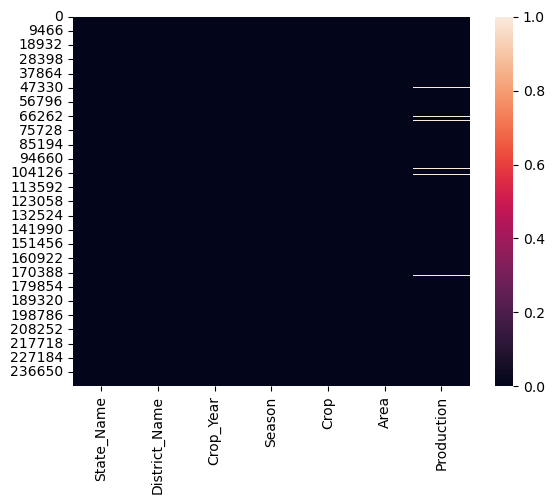

In [11]:
sns.heatmap(df.isna())

- it shows that the "Production" column has 3730 missing values.

In [12]:
df.duplicated().any()

False

- it represents that each row in the dataset is unique, and there are no exact duplicates based on all columns.

### HANDLING MISSING VALUES

In [13]:
df['Production'].fillna(df['Production'].mean(), inplace=True)

In [14]:
df['Production'].isna().sum()

0

- now the missing values are filled

# EXPLORATORY DATA ANALYSIS

In [15]:
print("    CROP_PRODUCTION    ".title())
print("--------------------------------")
print("The number of unique states : ",df["State_Name"].nunique())
print("The number of unique district: ",df["District_Name"].nunique())
print("The number of unique Years: ",df["Crop_Year"].nunique())
print("The number of unique Season: ",df["Season"].nunique())
print("The number of unique crop: ",df["Crop"].nunique())

    Crop_Production    
--------------------------------
The number of unique states :  33
The number of unique district:  646
The number of unique Years:  19
The number of unique Season:  6
The number of unique crop:  124


## DESCRIPTIVE ANALYSIS

In [16]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State_Name,246091,33,Uttar Pradesh,33306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
District_Name,246091,646,BIJAPUR,945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crop_Year,246091.0,NaN,NaN,NaN,2005.643018,4.952164,1997.0,2002.0,2006.0,2010.0,2015.0
Season,246091,6,Kharif,95951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crop,246091,124,Rice,15104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,246091.0,NaN,NaN,NaN,12002.820864,50523.404019,0.04,80.0,582.0,4392.0,8580100.0
Production,246091.0,NaN,NaN,NaN,582503.442251,16935985.596992,0.0,91.0,788.0,8000.0,1250800000.0


- There are 33 unique states in the dataset.
- Uttar Pradesh is the state with the highest frequency (33306).
- There are 646 unique districts in the dataset.
- Bijapur is the district with the highest frequency (945).
- The range of crop years is from 1997 to 2015.
- There are six unique seasons.
- Kharif season has the highest frequency (95951).
- There are 124 unique crops in the dataset.
- Rice is the most common crop, with the highest frequency (15104).
- The area of land used for cultivation varies widely, with a mean of 12002.82
- The minimum area is 0.04, and the maximum area is 8580100.0
- The minimum production is 0, and the maximum production is 1250800000.0


## UNIVARIABLE ANALYSIS

In [17]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

### State_Name

#### Distribution of Top 10 States

In [18]:
df["State_Name"].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [19]:
df["State_Name"].nunique()

33

In [20]:
top_states = df['State_Name'].value_counts().head(10)

In [21]:
top_states

Uttar Pradesh     33306
Madhya Pradesh    22943
Karnataka         21122
Bihar             18885
Assam             14628
Odisha            13575
Tamil Nadu        13547
Maharashtra       12628
Rajasthan         12514
Chhattisgarh      10709
Name: State_Name, dtype: int64

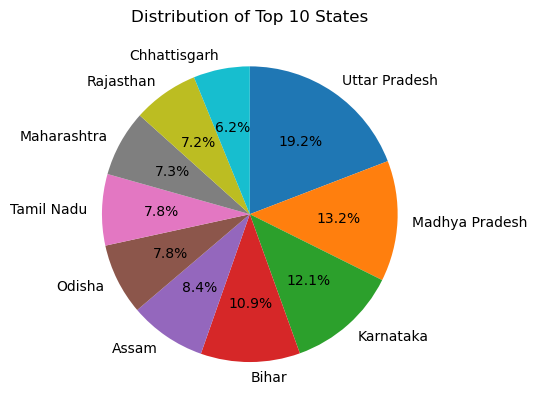

In [22]:
plt.pie(top_states, autopct="%.1f%%", labels=top_states.index, startangle=90, counterclock=False)
plt.title('Distribution of Top 10 States')
plt.show()
# index property of a Series contains the labels (names) associated with each element in the Series

- Uttar Pradesh is the most frequently occured state in the dataset, followed by Madhya Pradesh and Karnataka.

#### Bottom 5 States 

In [23]:
bottom_states =  df['State_Name'].value_counts().tail(5)

In [24]:
bottom_states

Sikkim                         714
Dadra and Nagar Haveli         263
Goa                            208
Andaman and Nicobar Islands    203
Chandigarh                      90
Name: State_Name, dtype: int64

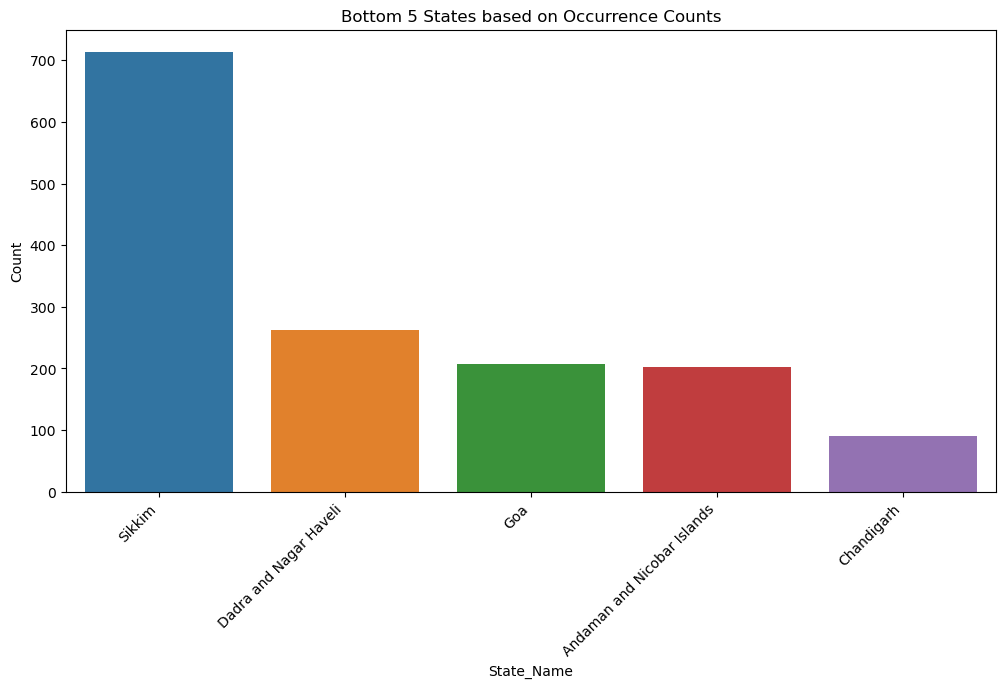

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(x='State_Name', data=df, order=bottom_states.index)
plt.title('Bottom 5 States based on Occurrence Counts')
plt.xlabel('State_Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


- Chandigarh  is the lowest frequently occurrenced states, in the dataset, followed by Andaman and Nicobar Islands, and Goa.

### District_Name

In [26]:
df["District_Name"].unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [27]:
df["District_Name"].nunique()

646

#### Distribution of top 10  District_Name

In [28]:
top_districts = df['District_Name'].value_counts().head(10)

In [29]:
top_districts

BIJAPUR           945
TUMKUR            936
BELGAUM           925
HASSAN            895
BELLARY           887
DAVANGERE         886
AURANGABAD        879
HAVERI            870
CHAMARAJANAGAR    844
CHITRADURGA       840
Name: District_Name, dtype: int64

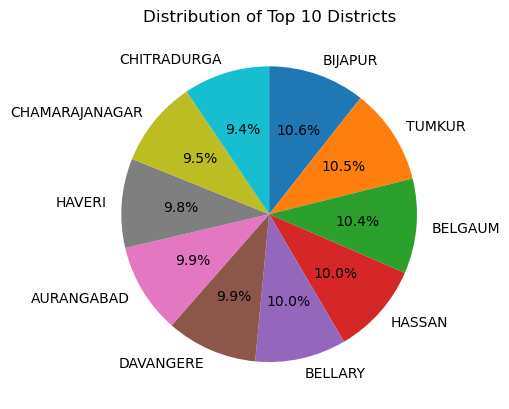

In [30]:
plt.pie(top_districts, autopct="%.1f%%", labels=top_districts.index, startangle=90, counterclock=False)
plt.title('Distribution of Top 10 Districts')
plt.show()
# index property of a Series contains the labels (names) associated with each element in the Series

- BIJAPUR is the most frequently occured district in the dataset, followed by TUMKUR and BELGAUM.

#### Distribution of bottom 5 Districts

In [31]:
bottom_districts =  df['District_Name'].value_counts().tail(5)

In [32]:
bottom_districts

HYDERABAD    8
KHUNTI       6
RAMGARH      6
NAMSAI       1
MUMBAI       1
Name: District_Name, dtype: int64

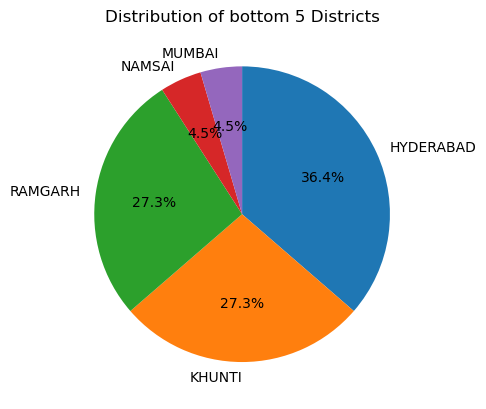

In [33]:
plt.pie(bottom_districts, autopct="%.1f%%", labels=bottom_districts.index, startangle=90, counterclock=False)
plt.title('Distribution of bottom 5 Districts')
plt.show()
# index property of a Series contains the labels (names) associated with each element in the Series

- NAMSAI and MUMBAI is the lowest frequently occurrenced district in the dataset, followed by RAMGARH,KHUNTI and HYDERABAD.
       


### Crop_Year

In [34]:
df['Crop_Year'].nunique()

19

In [35]:
df['Crop_Year'].value_counts()

2003    17287
2002    16671
2008    14550
2007    14526
2006    14328
2004    14117
2009    14116
2011    14071
2010    14065
2005    13799
2000    13658
2013    13650
2012    13410
2001    13361
1999    12515
1998    11533
2014    10973
1997     8899
2015      562
Name: Crop_Year, dtype: int64

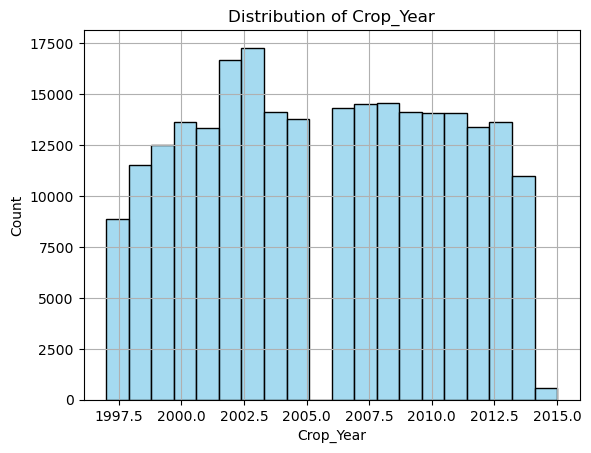

In [36]:
sns.histplot(df['Crop_Year'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Crop_Year')
plt.xlabel('Crop_Year')
plt.ylabel('Count')
plt.grid()
plt.show()


- The most frequent years for crop harvesting activities are 2003, 2002, 2008, 2007, and 2006. From 2000 to 2013, there was a consistent high number of harvesting activities. However, in 2015, the count decreased significantly, possibly due to incomplete data or a genuine decrease in agricultural activities. 

### Season

In [37]:
df["Season"].nunique()

6

In [38]:
df["Season"].value_counts()

Kharif         95951
Rabi           66987
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: Season, dtype: int64

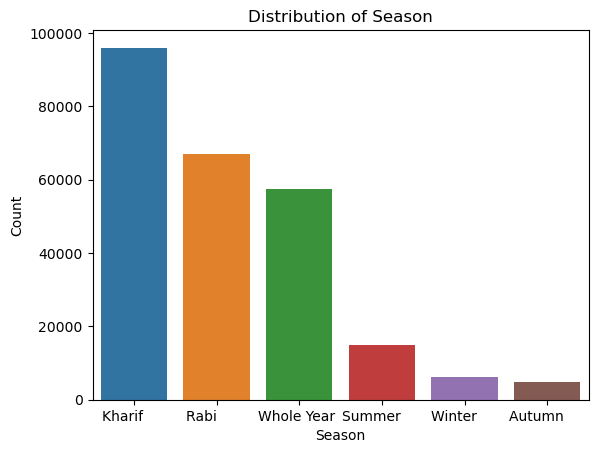

In [39]:
sns.countplot(x='Season', data=df, order=df['Season'].value_counts().index)
plt.title('Distribution of Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

- Kharif is the most frequent season, followed by Rabi and Whole Year, indicating significant crop cultivation. 
- Summer, Winter, and Autumn have lower occurrences.

### Crop

In [41]:
df["Crop"].nunique()

124

In [42]:
top_crops = df["Crop"].value_counts().head(10)
top_crops

Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Groundnut             8834
Sugarcane             7921
Wheat                 7899
Rapeseed &Mustard     7592
Arhar/Tur             7578
Name: Crop, dtype: int64

#### Distribution of top 10 Crop

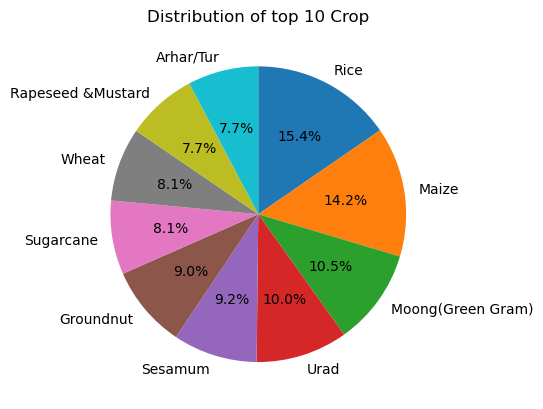

In [54]:
plt.pie(top_crops, autopct="%.1f%%", labels=top_crops.index, startangle=90, counterclock=False)
plt.title('Distribution of top 10 Crop')
plt.show()


- Rice is the most frequently cultivated crop, followed by maize, moose, urad.These crops contribute significantly to agricultural practices.

#### Distribution of short 8 Crops

In [43]:
short_crops = df["Crop"].value_counts().tail(8)
short_crops

Turnip             8
Pear               6
Plums              6
Litchi             6
Coffee             6
Apple              4
Peach              4
Other Dry Fruit    1
Name: Crop, dtype: int64

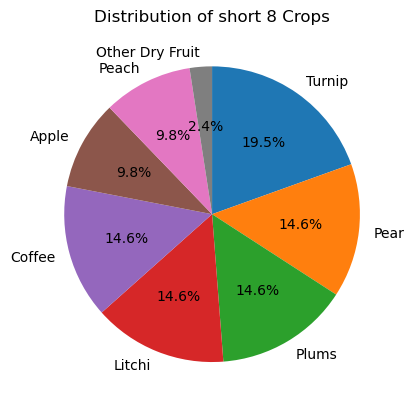

In [44]:
plt.pie(short_crops, autopct="%.1f%%", labels=short_crops.index, startangle=90, counterclock=False)
plt.title('Distribution of short 8 Crops')
plt.show()

- Other Dry Fruit has  less occurrence followed by Peach,Apple, Coffee.

### MULTIVARIABLE ANALYSIS

In [45]:
df.corr()

,Crop_Year,Area,Production
Crop_Year,1.000000,-0.026022,0.006945
Area,-0.026022,1.000000,0.040545
Production,0.006945,0.040545,1.000000


<Axes: >

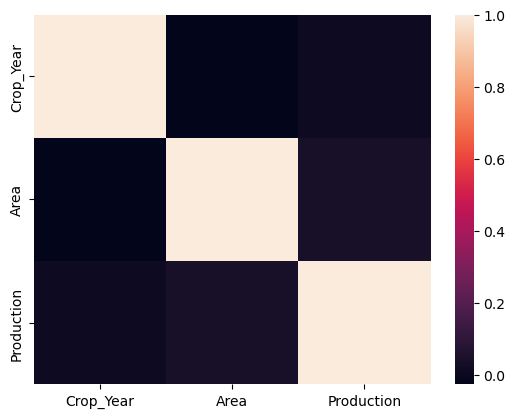

In [46]:
sns.heatmap(df.corr())

- The correlation coefficients are close to zero, indicating no strong linear relationship between Crop Year, Area, and Production, but a low correlation doesn't necessarily indicate no relationship.

# CONCLUSIONS:
**from descriptive analysis:**
- There are 33 unique states in the dataset.
- Uttar Pradesh is the state with the highest frequency (33306).
- There are 646 unique districts in the dataset.
- Bijapur is the district with the highest frequency (945).
- The range of crop years is from 1997 to 2015.
- There are six unique seasons.
- Kharif season has the highest frequency (95951).
- There are 124 unique crops in the dataset.
- Rice is the most common crop, with the highest frequency (15104).
- The area of land used for cultivation varies widely, with a mean of 12002.82
- The minimum area is 0.04, and the maximum area is 8580100.0
- The minimum production is 0, and the maximum production is 1250800000.0

**from univariable analysis:**
- Uttar Pradesh is the most frequently occured state in the dataset, followed by Madhya Pradesh and Karnataka.
- Chandigarh  is the lowest frequently occurrenced states, in the dataset, followed by Andaman and Nicobar Islands, and Goa.
- BIJAPUR is the most frequently occured district in the dataset, followed by TUMKUR and BELGAUM.
- NAMSAI and MUMBAI is the lowest frequently occurrenced district in the dataset, followed by RAMGARH,KHUNTI and HYDERABAD.
- The most frequent years for crop harvesting activities are 2003, 2002, 2008, 2007, and 2006. From 2000 to 2013, there was a consistent high number of harvesting activities. However, in 2015, the count decreased significantly, possibly due to incomplete data or a genuine decrease in agricultural activities.
- Kharif is the most frequent season, followed by Rabi and Whole Year, indicating significant crop cultivation. 
- Summer, Winter, and Autumn have lower occurrences.
- Rice is the most frequently cultivated crop, followed by maize, moose, urad.These crops contribute significantly to agricultural practices.
- Other Dry Fruit has  less occurrence followed by Peach,Apple, Coffee.

**from correlation analysis:**
- The correlation coefficients are close to zero, indicating no strong linear relationship between Crop Year, Area, and Production, but a low correlation doesn't necessarily indicate no relationship.

